In [2]:
# After comment data has been collected
# Next: import posts
# Arrange into the following table:
# postID, createdAt, userID, isRetweet, likeNo, commentNo, repostNo, comments
# Remove: 0 comments; isRetweet Posts
# Add 1 column: noAdWords
# Plot the following graphs:
# 1. Cluster repostNo
# 2. repostNo vs comment No
# 3. Cluster noAdWords
# 4. noAdWords vs repost No?

# Import libraries

In [3]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist

In [4]:
postInfo = pickle.load(open('postInfo.p', 'rb'))
cmtInfo = pickle.load(open('cmtInfo.p', 'rb'))

In [5]:
print len(postInfo), len(cmtInfo), len(postInfo.values()[0])

7 1428 1428


In [6]:
cmtData = pd.DataFrame(postInfo.values()).transpose()
cmtData.columns = postInfo.keys()

# Create "adword' feature

In [116]:

adWord1 = '广告|软广|软文|文案|写手|营销|炒作|摆拍|牌子|品牌|商家'
adWord1 = adWord1.decode('utf8')

adWord2 = ['广告', '软广', '软文', '文案', '写手', '营销', '炒作', '摆拍', '牌子', '品牌', '商家']
for k in adWord2:
    k = k.decode('utf8')

adWordNo2 = []
for i in cmtInfo:
    if isinstance(i, int):
        adWordNo2.append('Empty post')
    if isinstance(i, list):
        counter = 0
        for j in i:
            for k in adWord2:
                k = k.decode('utf8')
                if unicode(k) in j:
                    counter += 1
        adWordNo2.append(counter)

In [8]:
cmtData['adWordNo'] = adWordNo2

In [143]:
cmtLength = []
for i in cmtInfo:
    counter = 0
    if isinstance(i, int):
        cmtLength.append('Empty post')
    if isinstance(i, list):
        if len(i) == 0:
            cmtLength.append(0)
        else:
            for j in i:
                counter+=len(j)
            cmtLength.append(counter/float(len(i)))
#     print cmtLength


In [144]:
cmtData['commentAveLength'] = cmtLength

In [145]:
print cmtData.shape

(1428, 9)


In [146]:
cmtData.head()

,postID,repostNo,userID,likeNo,commentNo,isRetweet,createdAt,adWordNo,commentAveLength
0,3967733345110131,3638,3229125510,677,430,False,Sun Apr 24 10:26:48 +0800 2016,Empty post,Empty post
1,3967732766305727,238,1098618600,1233,168,False,Sun Apr 24 10:24:31 +0800 2016,0,19.0838
2,3967730811759574,634,2709577332,551,81,False,Sun Apr 24 10:16:45 +0800 2016,Empty post,Empty post
3,3967730728486176,52,1098618600,1337,562,False,Sun Apr 24 10:16:25 +0800 2016,0,0
4,3967730358857401,30,2903316485,319,22,False,Sun Apr 24 10:14:57 +0800 2016,0,18.2273


There are 387 "Empty post"s - lots of API calls that were refused. For these posts we don't have the comment data, and therefore cannot be included.

In [11]:
print sum(i == 'Empty post' for i in adWordNo2)

387


In [147]:
cmtData1 = cmtData[cmtData.adWordNo != 'Empty post']
cmtData1.shape

(1041, 9)

In [148]:
adWordRatio = []
for i, j in zip(cmtData1.adWordNo, cmtData1.commentNo):
    if j != 0:
        adWordRatio.append(float(i)/j)
    else:
        adWordRatio.append(0)
        
cmtData1['adWordRatio'] = adWordRatio

/Users/yingjiang/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [149]:
cmtData1.head()

,postID,repostNo,userID,likeNo,commentNo,isRetweet,createdAt,adWordNo,commentAveLength,adWordRatio
1,3967732766305727,238,1098618600,1233,168,False,Sun Apr 24 10:24:31 +0800 2016,0,19.0838,0.00000
3,3967730728486176,52,1098618600,1337,562,False,Sun Apr 24 10:16:25 +0800 2016,0,0,0.00000
4,3967730358857401,30,2903316485,319,22,False,Sun Apr 24 10:14:57 +0800 2016,0,18.2273,0.00000
6,3967729616806627,11,1098618600,515,177,False,Sun Apr 24 10:12:00 +0800 2016,0,0,0.00000
7,3967728744064671,17248,1764222885,8769,4356,False,Sun Apr 24 10:08:31 +0800 2016,1,26.75,0.00023


In [150]:
print sum(i > 10 for i in cmtData1.adWordNo)
print sum(i > 10 for i in cmtData1.adWordNo) / float(cmtData1.shape[0])
print sum(i > 0 for i in cmtData1.adWordNo)
print sum(i > 0 for i in cmtData1.adWordNo) / float(cmtData1.shape[0])

8
0.00768491834774
89
0.0854947166186


In [97]:
cmtData1.adWordRatio.describe()

count    1041.000000
mean        0.001924
std         0.015436
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.256098
Name: adWordRatio, dtype: float64

In [17]:
sum(cmtData1.isRetweet == True)

0

- Out of 1041 posts, 89 posts had comments that contained "ad" words.
- Out of these 89 posts, 8 posts had more than 10 comments that contained "ad" words.
- Out of these 89 posts, the number of comments with "ad" words to the total number of comments show there are posts with 43% of its comments having "ad" words in them (everyone is calling out on the account owner for writing an ad)
- No retweets, all original posts.

# Explore basic user engagement features (likes, reposts, comments)

In [18]:
cmtData1.repostNo.mean()

1726.5120076849184

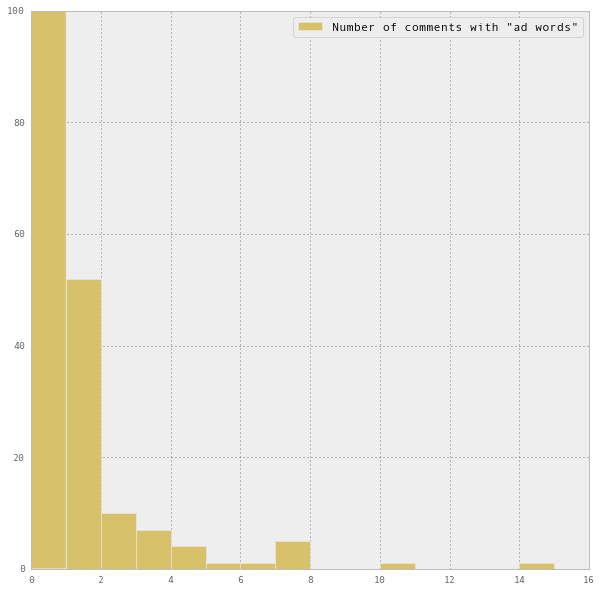

In [47]:
%matplotlib inline

plt.rcParams.update(pd.tools.plotting.mpl_stylesheet)
colors = pd.tools.plotting._get_standard_colors(1, color_type='random')
fig, ax = plt.subplots(figsize = (10, 10))
ax.set_color_cycle(colors)
ax.margins(0.05)

plt.xlim(0, 16)
plt.ylim(0, 100)

x = cmtData1.adWordNo
n, bins, patches = plt.hist(x, bins=np.arange(0, 20, 1), label='Number of comments with "ad words"')
    
ax.legend(numpoints=1, loc='upper right')

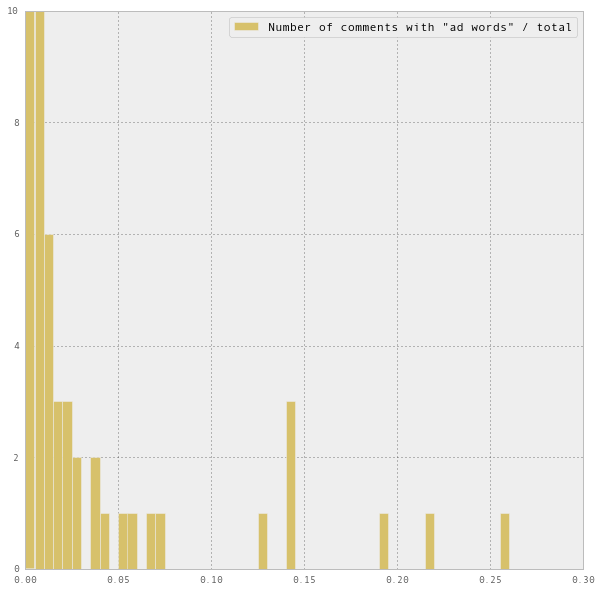

In [98]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.set_color_cycle(colors)
ax.margins(0.05)

plt.xlim(0, 0.3)
plt.ylim(0, 10)

x = cmtData1.adWordRatio
n, bins, patches = plt.hist(x, bins=np.arange(0, 0.3, 0.005), label='Number of comments with "ad words" / total')
    
ax.legend(numpoints=1, loc='upper right')

There are 3 or 4 single posts with a significant proportion of its comments shouting out "Ads!". E.g. 10%, 18%, 43%. More data is needed to get a better picture of this trend!

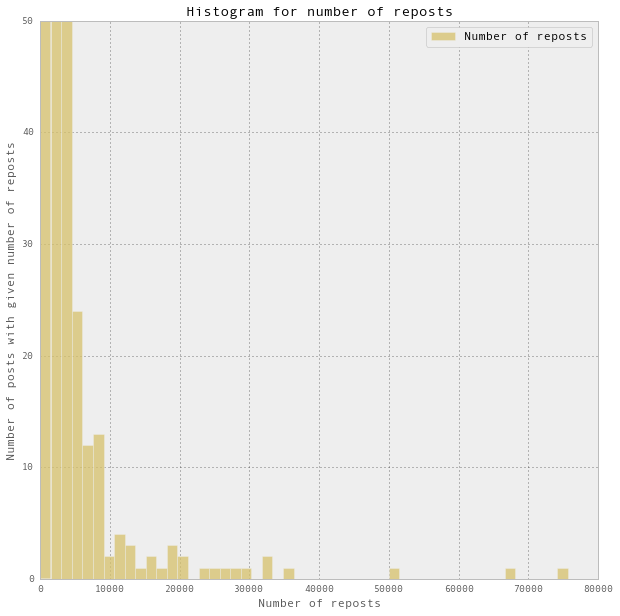

In [21]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.set_color_cycle(colors)
ax.margins(0.05)

plt.xlim(0, 80000)
plt.ylim(0, 50)

x = cmtData1.repostNo

plt.hist(x, 50, alpha = 0.75, label = 'Number of reposts')
# n, bins, patches = plt.hist(x, bins=np.arange(0, 1000, 80000), label='Number of "ad words"')
    
ax.legend(numpoints=1, loc='upper right')

plt.xlabel('Number of reposts')
plt.ylabel('Number of posts with given number of reposts')
plt.title('Histogram for number of reposts')

Repost numbers seem to peak at 10k, 20k, 30k, 50k, 70k etc. But, this signal is actually way weak. Need more data to confirm.

# Clustering
## 1. Cluster repost data vs adWord data
### 1a. Raw ad word number

[0 0 0 ..., 0 0 0]
[[  1.11270316e+03   4.15187377e-01]
 [  1.98131667e+04   4.16666667e-01]
 [  6.45006667e+04   0.00000000e+00]]


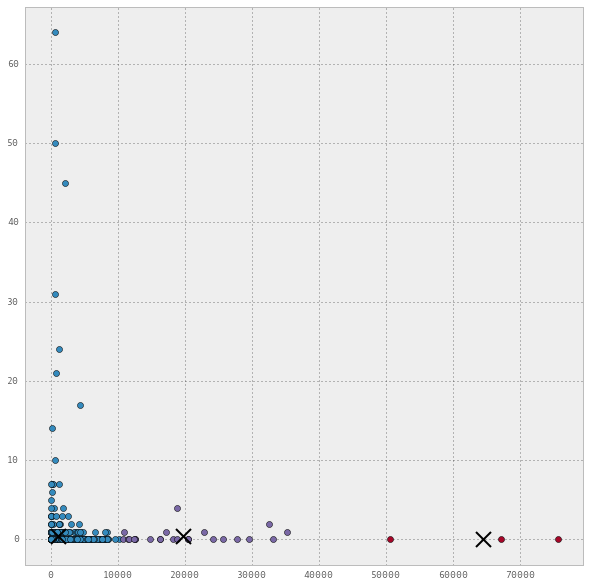

In [22]:
x = cmtData1[['repostNo', 'adWordNo']]
km = KMeans(3)
km.fit(x)

labels = km.labels_
centroids = km.cluster_centers_
print labels
print centroids

type(centroids)

fig, ax = plt.subplots(figsize = (10, 10))
# ax.set_color_cycle(colors)
ax.margins(0.05)

for i in range(3):
    ds = x[labels == i]
    # Plot the data
    plt.plot(ds.ix[:, 0], ds.ix[:, 1], 'o')
    # Plot the centroids
    lines = plt.plot(centroids[i, 0], centroids[i, 1], 'kx')
    # Make the centroid 'x's bigger
    plt.setp(lines, ms = 15)
    plt.setp(lines, mew = 2)
plt.show()
# Higher adwd, lower repostNos.

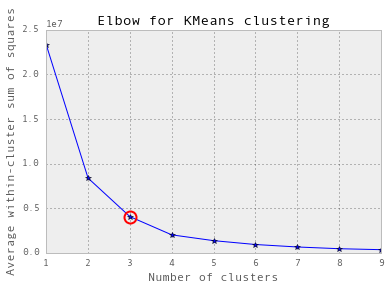

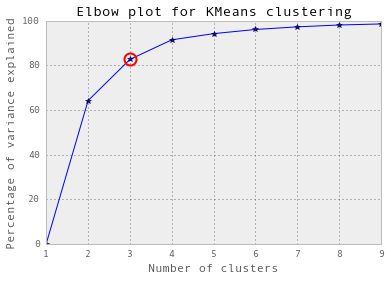

In [23]:
x = cmtData1[['repostNo', 'adWordNo']]
K = range(1,10)
km = [KMeans(n_clusters=k).fit(x) for k in K]
labels = [k.labels_ for k in km]
centroids = [k.cluster_centers_ for k in km]

wcss = []
for lab, cent in zip(labels, centroids):
    x_c = []
    wcss.append(0)
    for lab_, cent_ in zip(list(set(lab)), cent): # lab_ within lab: 0, 1, etc; cent_ within cent
        x_c = x[lab == lab_] # Generate subset of x that corresponds to the current lab_
        d = cdist(x_c, np.reshape(cent_, (-1, 2)), 'euclidean') # Generate vector of distances between x_c and current cent_ 
        wcss[-1] += float(sum(d**2))

tss = wcss[0]
y_elbow = [i/x.shape[0] for i in wcss]
y_rss = [100-i/tss*100 for i in wcss]

kIdx = 3-1

# Elbow plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, y_elbow, 'b*-')
ax.plot(K[kIdx], y_elbow[kIdx],
        marker='o', markersize=12, markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

# Variance explained plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, y_rss, 'b*-')
ax.plot(K[kIdx], y_rss[kIdx],
        marker='o', markersize=12, markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow plot for KMeans clustering')

### 1b. Ad word ratio

[[  1.11270316e+03   1.97298283e-03]
 [  6.45006667e+04   0.00000000e+00]
 [  1.98131667e+04   9.79213796e-05]]


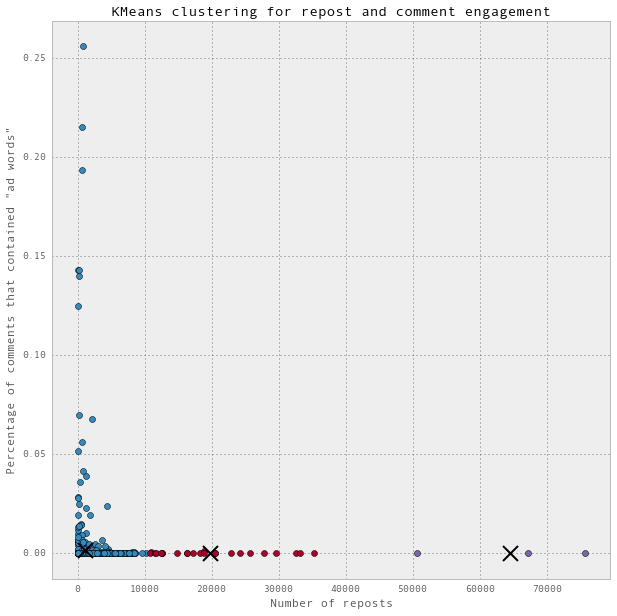

In [99]:
x = cmtData1[['repostNo', 'adWordRatio']]
km = KMeans(3)
km.fit(x)

labels = km.labels_
centroids = km.cluster_centers_
print centroids

type(centroids)

fig, ax = plt.subplots(figsize = (10, 10))
# ax.set_color_cycle(colors)
ax.margins(0.05)

for i in range(3):
    ds = x[labels == i]
    # Plot the data
    plt.plot(ds.ix[:, 0], ds.ix[:, 1], 'o')
    # Plot the centroids
    lines = plt.plot(centroids[i, 0], centroids[i, 1], 'kx')
    # Make the centroid 'x's bigger
    plt.setp(lines, ms = 15)
    plt.setp(lines, mew = 2)

plt.xlabel('Number of reposts')
plt.ylabel('Percentage of comments that contained "ad words"')
plt.title('KMeans clustering for repost and comment engagement')


#### Justifying the number of centers through elbow plots:

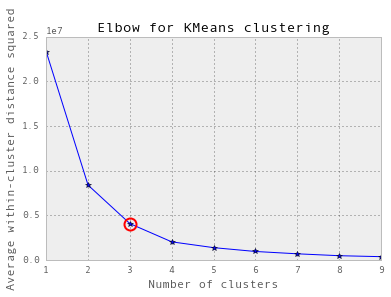

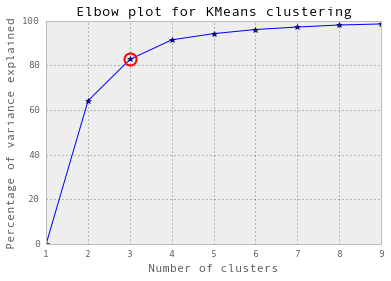

In [51]:
x = cmtData1[['repostNo', 'adWordRatio']]
K = range(1,10)
km = [KMeans(n_clusters=k).fit(x) for k in K]
labels = [k.labels_ for k in km]
centroids = [k.cluster_centers_ for k in km]

wcss = []
for lab, cent in zip(labels, centroids):
    x_c = []
    wcss.append(0)
    for lab_, cent_ in zip(list(set(lab)), cent): # lab_ within lab: 0, 1, etc; cent_ within cent
        x_c = x[lab == lab_] # Generate subset of x that corresponds to the current lab_
        d = cdist(x_c, np.reshape(cent_, (-1, 2)), 'euclidean') # Generate vector of distances between x_c and current cent_ 
        wcss[-1] += float(sum(d**2))

tss = wcss[0]
y_elbow = [i/x.shape[0] for i in wcss]
y_rss = [100-i/tss*100 for i in wcss]

kIdx = 3-1

# Elbow plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, y_elbow, 'b*-')
ax.plot(K[kIdx], y_elbow[kIdx],
        marker='o', markersize=12, markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster distance squared')
plt.title('Elbow for KMeans clustering')

# Variance explained plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, y_rss, 'b*-')
ax.plot(K[kIdx], y_rss[kIdx],
        marker='o', markersize=12, markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow plot for KMeans clustering')

#### Justifying the number of centers through silhouette plots:

### 2. Cluster adWordNo only

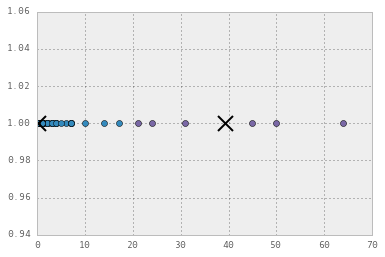

In [100]:

x = pd.DataFrame(cmtData1['adWordNo'])
nclusters = 2
km = KMeans(nclusters)
km.fit(x)
labels = km.labels_
centroids = km.cluster_centers_

for i in range(nclusters):
    ds = x[labels == i]
    # Plot the data
    plt.plot(ds, pd.DataFrame([1] * len(ds)), 'o')
    # Plot the centroids
    lines = plt.plot(centroids[i, 0], 1, 'kx')
    # Make the centroid 'x's bigger
    plt.setp(lines, ms = 15)
    plt.setp(lines, mew = 2)
plt.show()
# Higher adwd, lower repostNos.


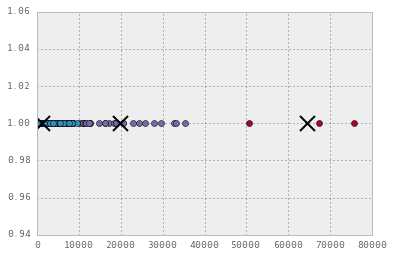

In [27]:
# 3. Cluster repostNo only
x = pd.DataFrame(cmtData1['repostNo'])
nclusters = 3
km = KMeans(nclusters)
km.fit(x)
labels = km.labels_
centroids = km.cluster_centers_

for i in range(nclusters):
    ds = x[labels == i]
    # Plot the data
    plt.plot(ds, pd.DataFrame([1] * len(ds)), 'o')
    # Plot the centroids
    lines = plt.plot(centroids[i, 0], 1, 'kx')
    # Make the centroid 'x's bigger
    plt.setp(lines, ms = 15)
    plt.setp(lines, mew = 2)
plt.show()

### 4. Cluster comment no vs adWord no

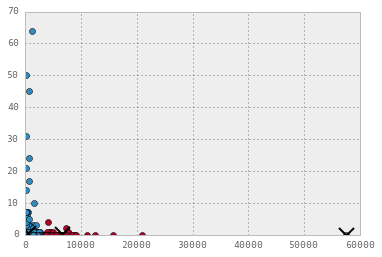

In [28]:

x = cmtData1[['commentNo', 'adWordNo']]
nclusters = 3
km = KMeans(nclusters)
km.fit(x)

labels = km.labels_
centroids = km.cluster_centers_

for i in range(nclusters):
    ds = x[labels == i]
    # Plot the data
    plt.plot(ds.ix[:, 0], ds.ix[:, 1], 'o')
    # Plot the centroids
    lines = plt.plot(centroids[i, 0], centroids[i, 1], 'kx')
    # Make the centroid 'x's bigger
    plt.setp(lines, ms = 15)
    plt.setp(lines, mew = 2)
plt.show()


Larger number of comments, less comments with adwords. Consistent with the repost trend, since number of comments positively correlates with number of reposts.

In [29]:
centroids

array([[  4.84966967e+02,   4.19419419e-01],
       [  5.75560000e+04,   0.00000000e+00],
       [  6.57219512e+03,   2.92682927e-01]])

### 5. Cluster comment no vs repost no

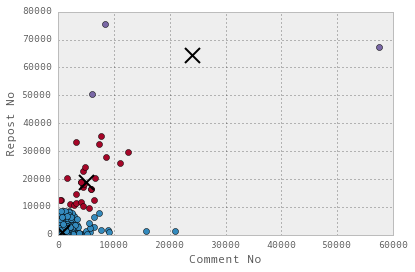

In [30]:

# Try: 3 or 4 centers
x = cmtData1[['commentNo', 'repostNo']]
nclusters = 3
km = KMeans(nclusters)
km.fit(x)

labels = km.labels_
centroids = km.cluster_centers_

for i in range(nclusters):
    ds = x[labels == i]
    # Plot the data
    plt.plot(ds.ix[:, 0], ds.ix[:, 1], 'o')
    # Plot the centroids
    lines = plt.plot(centroids[i, 0], centroids[i, 1], 'kx')
    # Make the centroid 'x's bigger
    plt.setp(lines, ms = 15)
    plt.setp(lines, mew = 2)

plt.xlabel('Comment No')
plt.ylabel('Repost No')

plt.show()
# Cluster centroids do grow together, almost linearly. However:
# Cluster 1: Low repost, low comments - normal
# Cluster 2: Low comments, mid-high repost - rigged?
# Cluster 3: 1 outlier, high comments, high repost - normal (high impact posts)

In [31]:
centroids

array([[   603.54545455,   1095.40513834],
       [ 24018.66666667,  64500.66666667],
       [  4948.23076923,  19047.96153846]])

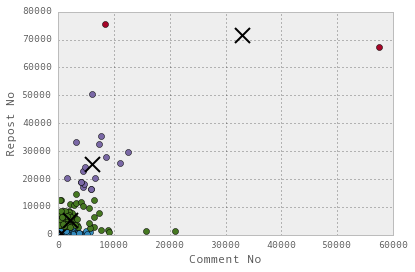

In [32]:
x = cmtData1[['commentNo', 'repostNo']]
nclusters = 4
km = KMeans(nclusters)
km.fit(x)

labels = km.labels_
centroids = km.cluster_centers_

for i in range(nclusters):
    ds = x[labels == i]
    # Plot the data
    plt.plot(ds.ix[:, 0], ds.ix[:, 1], 'o')
    # Plot the centroids
    lines = plt.plot(centroids[i, 0], centroids[i, 1], 'kx')
    # Make the centroid 'x's bigger
    plt.setp(lines, ms = 15)
    plt.setp(lines, mew = 2)

plt.xlabel('Comment No')
plt.ylabel('Repost No')

plt.show()
# Cluster 1: Low repost, low comments - normal
# Cluster 2: Low comments, mid-high repost - rigged?
# Cluster 3: 1 outlier, high comments, high repost - normal

In [33]:
centroids

array([[   440.15876516,    667.65049614],
       [  6018.11764706,  25218.        ],
       [ 32986.        ,  71448.        ],
       [  2121.68695652,   5392.50434783]])

### 6. Cluster everyting

In [151]:
x = cmtData1[['commentNo', 'repostNo', 'likeNo', 'isRetweet', 'adWordNo', 'commentAveLength']]
nclusters = 3
km = KMeans(nclusters)
km.fit(x)

labels = km.labels_
centroids = km.cluster_centers_

x_clustered = [x[labels == i] for i in range(nclusters)]

In [152]:
print x_clustered[0].shape
print x_clustered[1].shape
print x_clustered[2].shape

(1003, 6)
(36, 6)
(2, 6)


In [153]:
x_clustered[0].head()

,commentNo,repostNo,likeNo,isRetweet,adWordNo,commentAveLength
1,168,238,1233,False,0,19.0838
3,562,52,1337,False,0,0
4,22,30,319,False,0,18.2273
6,177,11,515,False,0,0
8,587,2891,3473,False,0,0


In [154]:
x_clustered[1]

,commentNo,repostNo,likeNo,isRetweet,adWordNo,commentAveLength
7,4356,17248,8769,False,1,26.75
26,4444,22843,11145,False,1,22.6392
71,1272,7935,16149,False,0,0
76,7662,1843,23922,False,1,19.186
85,20974,1383,13744,False,0,34.2408
87,1722,3864,22395,False,0,0
111,7245,32594,34575,False,2,25.2337
118,773,1554,17977,False,1,24.0657
148,3226,14787,8625,False,0,17.8477
150,5855,2667,22367,False,0,18.2437


In [155]:
x_clustered[2].head()

,commentNo,repostNo,likeNo,isRetweet,adWordNo,commentAveLength
365,57556,67228,95295,False,0,0
923,8416,75668,53880,False,0,67.672


In [156]:
cmtData1.head(10)

,postID,repostNo,userID,likeNo,commentNo,isRetweet,createdAt,adWordNo,commentAveLength,adWordRatio
1,3967732766305727,238,1098618600,1233,168,False,Sun Apr 24 10:24:31 +0800 2016,0,19.0838,0.000000
3,3967730728486176,52,1098618600,1337,562,False,Sun Apr 24 10:16:25 +0800 2016,0,0,0.000000
4,3967730358857401,30,2903316485,319,22,False,Sun Apr 24 10:14:57 +0800 2016,0,18.2273,0.000000
6,3967729616806627,11,1098618600,515,177,False,Sun Apr 24 10:12:00 +0800 2016,0,0,0.000000
7,3967728744064671,17248,1764222885,8769,4356,False,Sun Apr 24 10:08:31 +0800 2016,1,26.75,0.000230
8,3967728391673674,2891,2709577332,3473,587,False,Sun Apr 24 10:07:08 +0800 2016,0,0,0.000000
9,3967728244513191,574,1618051664,878,584,False,Sun Apr 24 10:06:34 +0800 2016,0,0,0.000000
11,3967727868267645,3673,1742566624,7674,407,False,Sun Apr 24 10:05:03 +0800 2016,0,11.3333,0.000000
12,3967727867536482,1335,2430259303,2948,461,False,Sun Apr 24 10:05:03 +0800 2016,2,18.4549,0.004338
14,3967727720871100,62,1098618600,1090,243,False,Sun Apr 24 10:04:28 +0800 2016,1,13.4524,0.004115


Three groups after clustering everything:
1. Low likes, low reposts etc
2. High likes, high reposts (36 posts)
3. Extremely high engagement. Is this group real? need more data.

### 7. Examine the correlation between average length in comments with reach

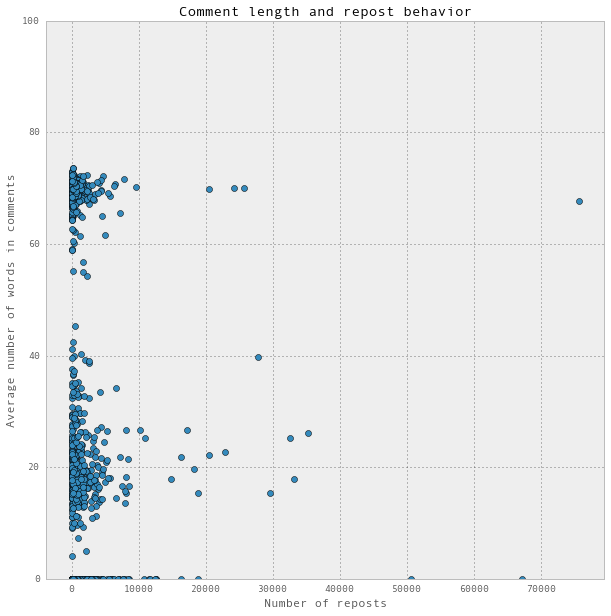

In [158]:
fig, ax = plt.subplots(figsize = (10, 10))
# ax.set_color_cycle(colors)
ax.margins(0.05)

# plt.xlim(0, 0.3)
plt.ylim(0, 100)

plt.plot(cmtData1.repostNo, cmtData1.commentAveLength, 'o')
lines = plt.plot(centroids[i, 0], centroids[i, 1], 'kx')

plt.xlabel('Number of reposts')
plt.ylabel('Average number of words in comments')
plt.title('Comment length and repost behavior')


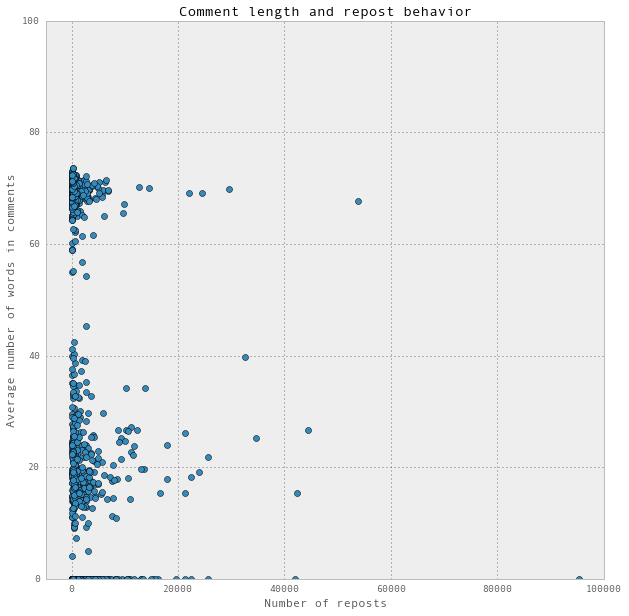

In [160]:
fig, ax = plt.subplots(figsize = (10, 10))
# ax.set_color_cycle(colors)
ax.margins(0.05)

# plt.xlim(0, 0.3)
plt.ylim(0, 100)

plt.plot(cmtData1.likeNo, cmtData1.commentAveLength, 'o')
lines = plt.plot(centroids[i, 0], centroids[i, 1], 'kx')

plt.xlabel('Number of reposts')
plt.ylabel('Average number of words in comments')
plt.title('Comment length and repost behavior')
